<p style='text-align:center; font-size:250%; font-weight:bold'>FEATURE SELECTION</p>
<p style='text-align:center; font-size:150%'>Author: Andrean Yonathan</p>

# Import Library

In [1]:
import pandas as pd
import numpy as np

# Load Data

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# <p style='text-align: center; font-size:150%'>Feature Selection Manual</p>

# Drop Columns

In [3]:
df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], inplace = True) # drop columns
df.dropna(inplace = True) # drop missing values

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [4]:
# menambah kolom Alone

df['Alone'] = (df['SibSp'] + df['Parch']).apply(lambda x: 1 if x == 0 else 0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Alone
0,0,3,male,22.0,1,0,S,0
1,1,1,female,38.0,1,0,C,0
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,0
4,0,3,male,35.0,0,0,S,1


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

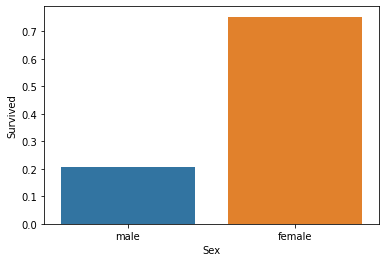

In [5]:
import seaborn as sns

sns.barplot(x = 'Sex', y = 'Survived', data = df, ci = None)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

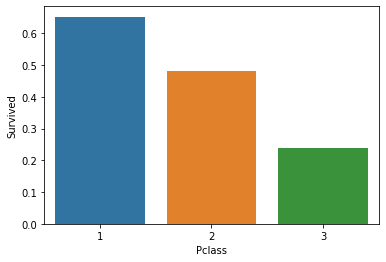

In [6]:
sns.barplot(x = 'Pclass', y = 'Survived', data = df, ci = None)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

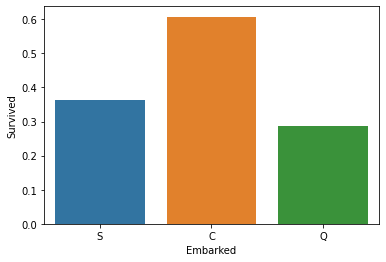

In [7]:
sns.barplot(x = 'Embarked', y = 'Survived', data = df, ci = None)

[Text(0, 0, 'Alone'), Text(1, 0, 'Not Alone')]

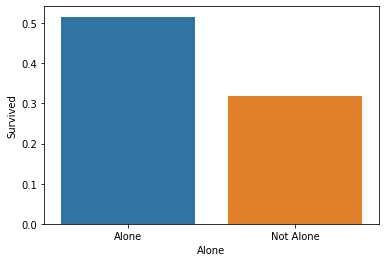

In [8]:
ax = sns.barplot(x = 'Alone', y = 'Survived', data = df, ci = None)
ax.set_xticklabels(['Alone', 'Not Alone'])

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['Sex'])
df['Sex'] = le.transform(df['Sex'])
sex_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(sex_labels)

{'female': 0, 'male': 1}


In [10]:
le.fit(df['Embarked'])
df['Embarked'] = le.transform(df['Embarked'])
embarked_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(embarked_labels)

{'C': 0, 'Q': 1, 'S': 2}


# Feature Selection with Library

In [11]:
# split dataset
#X = Featurs ; Y = Class

X=df.iloc[:,1:]
X

,Pclass,Sex,Age,SibSp,Parch,Embarked,Alone
0,3,1,22.0,1,0,2,0
1,1,0,38.0,1,0,0,0
2,3,0,26.0,0,0,2,1
3,1,0,35.0,1,0,2,0
4,3,1,35.0,0,0,2,1
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,1,0
886,2,1,27.0,0,0,2,1
887,1,0,19.0,0,0,2,1
889,1,1,26.0,0,0,0,1


In [12]:
Y = df.iloc[:,0]
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [13]:
# Metode Filter -> Chi Square
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScore = pd.concat([dfcolumns, dfscores], axis=1)
featureScore.columns = ['Attr', 'Score']
print(featureScore.nlargest(4,'Score'))

     Attr      Score
1     Sex  74.621277
2     Age  34.246098
0  Pclass  28.243213
6   Alone  12.367930


In [14]:
#Metode Wrap -> RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select = 4)
fit = rfe.fit(X,Y)

print("Num Features: %s" %(fit.n_features_))
print("Selected Features: %s" %(fit.support_))
print("Feature Ranking: %s" %(fit.ranking_))

dfscores = pd.DataFrame(fit.support_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=["Attr", "Score"]
print(featureScores.nlargest(7,'Score'))

Num Features: 4
Selected Features: [ True  True False  True False False  True]
Feature Ranking: [1 1 4 1 3 2 1]
       Attr  Score
0    Pclass   True
1       Sex   True
3     SibSp   True
6     Alone   True
2       Age  False
4     Parch  False
5  Embarked  False


In [15]:
# Feature Selection metode Embbeded
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)
print(ridge.coef_)

def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X-%s" % x for x in X.columns]
    print(names)
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print ("Ridge model:", pretty_print_coefs(ridge.coef_))

[-0.18763164 -0.47146259 -0.0064066  -0.07481059 -0.0276207  -0.02804507
 -0.09431468]
['X-Pclass', 'X-Sex', 'X-Age', 'X-SibSp', 'X-Parch', 'X-Embarked', 'X-Alone']
Ridge model: -0.188 * X-Pclass + -0.471 * X-Sex + -0.006 * X-Age + -0.075 * X-SibSp + -0.028 * X-Parch + -0.028 * X-Embarked + -0.094 * X-Alone


In [16]:
"""
Pada Ridge regression akan menghasilkan bobot untuk tiap attribute.
"""

'\nPada Ridge regression akan menghasilkan bobot untuk tiap attribute.\n'